In [1]:
# import
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
bok_rate = pd.read_csv('bok_rate.csv')
bok_rate

,date,bok_rate
0,2020-05-28,0.50
1,2020-03-17,0.75
2,2019-10-16,1.25
3,2019-07-18,1.50
4,2018-11-30,1.75
5,2017-11-30,1.50
6,2016-06-09,1.25
7,2015-06-11,1.50
8,2015-03-12,1.75
9,2014-10-15,2.00


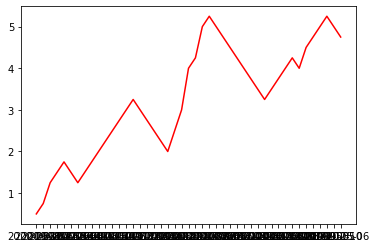

In [3]:
bok_rate_x = bok_rate['date']
bok_rate_y = bok_rate['bok_rate']

plt.plot(bok_rate_x, bok_rate_y, color="red")
plt.show()

In [4]:
# 기준금리데이터가 2004년 11월 11일, 2005년 10월 11일 데이터가 있어서 2005년 1월 1일부터의 데이터를 만들어주기위해 20041111부터 시작.
dt_index = pd.date_range(start='20041111', end='20171231')
dt_list = dt_index.strftime("%Y-%m-%d").tolist()

mk_bok_rate = pd.DataFrame(dt_list ,columns = ['date'])
mk_bok_rate

,date
0,2004-11-11
1,2004-11-12
2,2004-11-13
3,2004-11-14
4,2004-11-15
...,...
4794,2017-12-27
4795,2017-12-28
4796,2017-12-29
4797,2017-12-30


In [5]:
mk_bok_rate = pd.merge(mk_bok_rate,bok_rate, on='date',how='left')
mk_bok_rate

,date,bok_rate
0,2004-11-11,3.25
1,2004-11-12,NaN
2,2004-11-13,NaN
3,2004-11-14,NaN
4,2004-11-15,NaN
...,...,...
4794,2017-12-27,NaN
4795,2017-12-28,NaN
4796,2017-12-29,NaN
4797,2017-12-30,NaN


In [7]:
mk_bok_rate = mk_bok_rate.replace(np.nan, 0)

for i in range(len(mk_bok_rate)):
    if mk_bok_rate['bok_rate'][i] == 0:
        mk_bok_rate['bok_rate'][i] = mk_bok_rate['bok_rate'][i-1]
mk_bok_rate

c:\python\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,date,bok_rate
0,2004-11-11,3.25
1,2004-11-12,3.25
2,2004-11-13,3.25
3,2004-11-14,3.25
4,2004-11-15,3.25
...,...,...
4794,2017-12-27,1.50
4795,2017-12-28,1.50
4796,2017-12-29,1.50
4797,2017-12-30,1.50


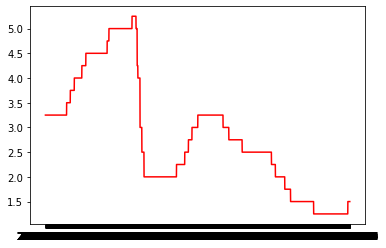

In [10]:
mk_bok_rate_x = mk_bok_rate['date']
mk_bok_rate_y = mk_bok_rate['bok_rate']

plt.plot(mk_bok_rate_x, mk_bok_rate_y, color="red")
plt.show()